In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler

1) Load Dataset.

In [3]:
col_names=["x","y"]
df=pd.read_csv("./mouse.csv",header=None, names=col_names)

#header=None / read first row as data.(not as header)

In [4]:
df.head()

,x,y
0,0.542269,0.434343
1,0.421568,0.508084
2,0.432454,0.561386
3,0.565750,0.569858
4,0.488102,0.479678


2) Visualize given dataset.

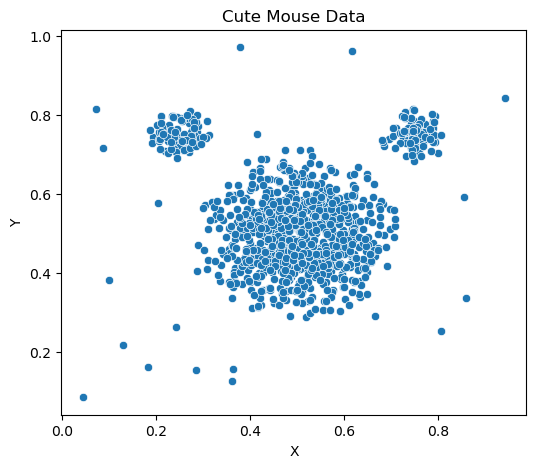

In [5]:
plt.figure(figsize=(6, 5))
sns.scatterplot(x=df.iloc[:, 0], y=df.iloc[:, 1])
plt.title('Cute Mouse Data')
plt.xlabel('X')
plt.ylabel('Y')
plt.show()


In [6]:
# SCALING.
X = df[['x', 'y']].values
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

3) k-means algorithm

In [7]:
from sklearn.neighbors import LocalOutlierFactor
from scipy.spatial.distance import mahalanobis
from sklearn.preprocessing import MinMaxScaler

    


def run_kmeans_and_plot(X_scaled, n_clusters, max_iter):
    
    
     # 1. clustering
    kmeans = KMeans(n_clusters=n_clusters, max_iter=max_iter, random_state=42, n_init='auto')
    labels = kmeans.fit_predict(X_scaled)

    # 2. Mahalanobis distance.
    cov_matrix = np.cov(X_scaled.T)
    inv_cov_matrix = np.linalg.inv(cov_matrix)

    mahal_distances = np.array([
        mahalanobis(X_scaled[i], kmeans.cluster_centers_[labels[i]], inv_cov_matrix)
        for i in range(len(X_scaled))
    ])

    # 3. calcuate LOF.
    lof = LocalOutlierFactor(n_neighbors=20)
    lof_scores = -lof.fit_predict(X_scaled)  
    lof_factors = -lof.negative_outlier_factor_  

    # 4.  Normalize both Mahalanobis distances and LOF scores, then combine them
    scaler = MinMaxScaler()
    norm_distances = scaler.fit_transform(mahal_distances.reshape(-1, 1)).flatten()
    norm_lof = scaler.fit_transform(lof_factors.reshape(-1, 1)).flatten()

    # Weighted average of normalized distance and LOF score (adjustable weights)
    combined_score = 0.2 * norm_distances + 0.8 * norm_lof

    # 5.  Define outliers as points with combined score in the top 1.4%
    threshold = np.percentile(combined_score, 98.6)  
    outlier_mask = combined_score > threshold
    
    
    
        
    plt.figure(figsize=(5, 4))
    # cluster.
    for label in np.unique(labels):
        cluster_mask = (labels == label) & (~outlier_mask)
        plt.scatter(X_scaled[cluster_mask, 0], X_scaled[cluster_mask, 1],
                    label=f"Cluster {label}", s=100)
        
        
    # Noise(black).
    plt.scatter(X_scaled[outlier_mask, 0], X_scaled[outlier_mask, 1],
                color='black', label='Outliers', s=100)

    plt.title(f"k-Means Clustering (k={n_clusters}, iter={max_iter})")
    plt.xlabel("x")
    plt.ylabel("y")
    plt.legend()
    plt.grid(True)
    plt.show()

    return kmeans.inertia_, labels


In [8]:
# results = []


# for k in [2, 3, 4, 5, 6]:
#     for iters in [50,  300]:
        
#         inertia, labels = run_kmeans_and_plot(X_scaled, k, iters)
#         results.append({
#             'n_clusters': k,
#             'max_iter': iters,
#             'inertia': inertia
#         })


3 BEST RESULTS FOR Each algorithm

c:\Program Files\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=5.
  warnings.warn(


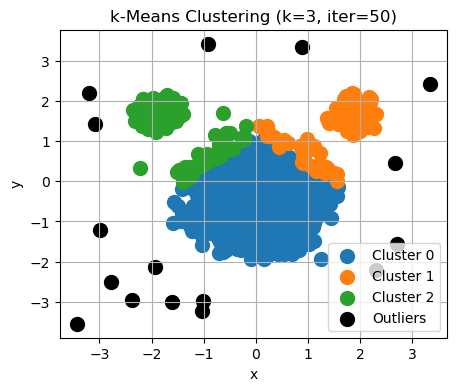

c:\Program Files\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=5.
  warnings.warn(


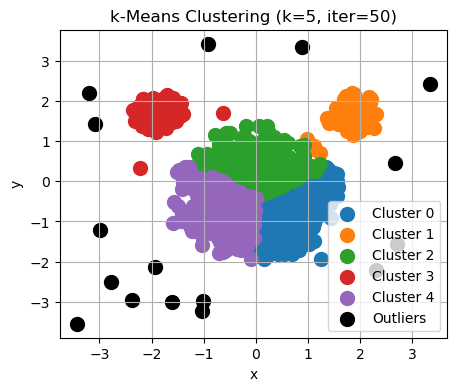

c:\Program Files\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=5.
  warnings.warn(


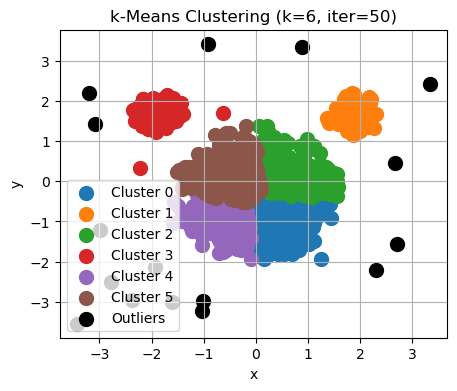

In [9]:
results = []


for k in [3, 5, 6]:
    for iters in [50]:
        
        inertia, labels = run_kmeans_and_plot(X_scaled, k, iters)
        results.append({
            'n_clusters': k,
            'max_iter': iters,
            'inertia': inertia
        })


I selected the following 3 results for K-Means as the best outcomes:

(K = 3, iter = 50) – This result shows well-separated clusters with minimal overlap.
Reason 1: I chose this result because, visually, the data clearly appeared to be grouped into three clusters.

(K = 5, iter = 50) – The clusters were compact and had similar sizes, indicating balanced groupings.
Reason 2: I selected this result since the largest cluster was divided most evenly, which made the grouping look more balanced.

(K = 6, iter = 50) – The visual separation was clear, and the inertia value was low, suggesting good clustering performance.
Reason 3: I chose this one because the cluster sizes were quite similar, which likely means the clustering captured the data characteristics well.


+ For iteration, 50 and 300 shows the smiliar result. so I choose 50. 


In my opinion  
K=6, iteration=50 shows the best result.  
Considering the cluster shaped like an ear, the clusters appear to be of similar size.